In [1]:
import pandas as pd
from scipy.stats import f_oneway


In [2]:
data = pd.read_excel('anova_lab_data.xlsx')


In [3]:
data.head()

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71


In [ ]:
#Understand the problem and write down the stpes to set up ANOVA
# - Null hypothesis - Alternate hypothesis - Level of significance - Test statistic - P-value - F table

CONTEXT - COLLECTING STEPS TO SETUP ANOVA

1. NULL HYPOTHESIS (H0)
There is no significant difference in the mean etching rate for different levels of power 

2. ALTERNATIVE HYPOTHESIS
We find difference in the mean etching rate with more than one power level

3. SIGNIFICANCE LEVEL, ALPHA
Commonly used 0,05 (5%)to determine the statistical significance

4. TEST STATISTIC
ANOVA: Analysis of Varience.

5. P-VALUE
Probability of obtaining a test statistic as extreme as the one observed

6. FTABLE
Used to determine critical 

7. DEGREES OF FREEDOM

Model (Between Groups): k - 1
Error (Within Groups): N - k
Total (Combined): N - 1

In [5]:
print(data.columns)


Index(['Power ', 'Etching Rate'], dtype='object')


In [17]:
# Removing extra space in column name
data.columns = data.columns.str.strip()

In [18]:
data['Etching Rate'] = pd.to_numeric(data['Etching Rate'], errors='coerce')


In [22]:
print(data.columns)

Index(['Power', 'Etching Rate'], dtype='object')


In [19]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

f_statistic, p_value = f_oneway(data['Etching Rate'][data['Power'] == 'Low'],
                                 data['Etching Rate'][data['Power'] == 'Medium'],
                                 data['Etching Rate'][data['Power'] == 'High'])


/Users/noelia.escobar/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [20]:
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')



F-Statistic: nan
P-Value: nan


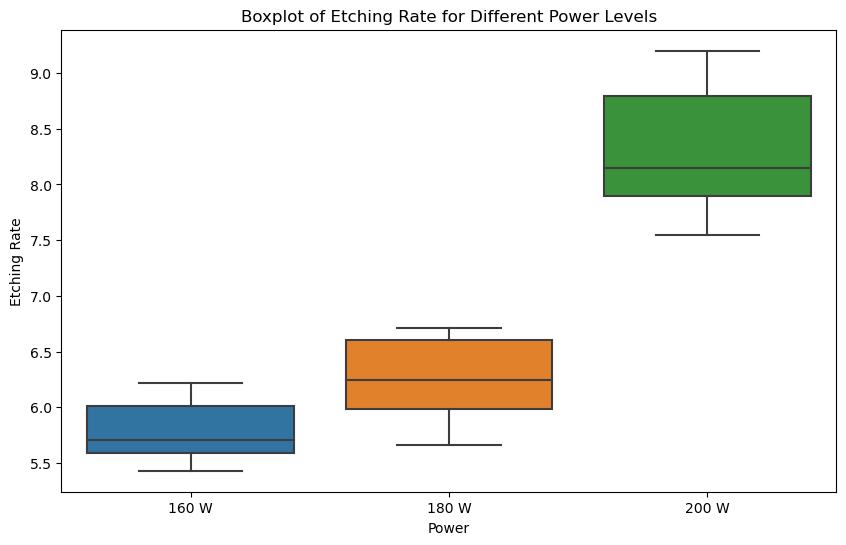

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Power', y='Etching Rate', data=data)
plt.title('Boxplot of Etching Rate for Different Power Levels')
plt.show()


In [25]:
# Set significance level
alpha = 0.05

# Draw conclusion based on p-value
if p_value < alpha:
    print("There is sufficient evidence to reject the null hypothesis.")
else:
    print("There is not enough evidence to reject the null hypothesis.")

There is not enough evidence to reject the null hypothesis.


In [30]:
#Completing solution

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Previous step: Renamed'Etching Rate' column to remove spaces
data = data.rename(columns={'Etching Rate': 'EtchingRate'})

# Previous step: Converted 'EtchingRate' to numeric (in case it's not)
data['EtchingRate'] = pd.to_numeric(data['EtchingRate'], errors='coerce')

# Performing ANOVA using statsmodels (sinc)
model = ols('EtchingRate ~ C(Power)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
display(anova_table)



,sum_sq,df,F,PR(>F)
C(Power),18.176653,2.0,36.878955,0.000008
Residual,2.957240,12.0,NaN,NaN


In [ ]:
# F refers to F-statistic for the residual.
#PR(>F)is the P-value associated with the residual F-statistic
#based on the low p-value for the Power factor, we have evidence to suggest that changing the power of the plasma beam has a significant effect on the etching rate by the machine.